In [1]:
#Import libraries
import pandas as pd
import numpy as np
import itertools

In [2]:
pd.set_option('display.max_columns', None)

In [73]:
#Import dataset
netflix = pd.read_excel('./Listed_in.xlsx', sheet_name=0).drop(columns=['title'])

In [74]:
#Check any NA values
netflix.isna().value_counts()

show_id  Listed_in
False    False        19341
dtype: int64

In [75]:
#Check unique tags
print(netflix['Listed_in'].nunique())
print(netflix['Listed_in'].unique())

60
['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV' 'Isabella Gutierrez'
 'Simon Baker' 'Will Meyers' 'Ava DeMary' 'Lydia Look' 'Asante Blackk'
 "Ayize Ma'at" 'Lovie Simone' 'Julian Richings' 'Kathryn Emily Douglas'
 'Chloe Pirrie' 'Jason Flemyng' 'Jon Hamm' 'Oona Chaplin' 'Rafe Spall'
 'Martijn Koning'

In [89]:
#Get tags into dataframe & export it
tags_list = netflix['Listed_in'].unique().tolist()
tags_df = pd.DataFrame(tags_list).rename(columns={'0': 'Name'})
tags_df.to_csv('./node_list.csv')
tags_df

,0
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
5,TV Action & Adventure
6,Docuseries
7,Reality TV
8,Romantic TV Shows
9,TV Comedies


In [77]:
#Get Unique show_id
show_id_list = netflix['show_id'].unique()
show_id_list

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [97]:
#Get all possible combinations of tags under the same show
tag_combine_list = []
single_appearance = []
#test_list = ['s1', 's2', 's3', 's4']

#Operate in each show_id
for show_id in show_id_list:
    df_filter = netflix[netflix['show_id'] == show_id]
    
    #If there are only 1 tags in the show, append to an overall list
    if (len(df_filter) == 1):
        #print(df_filter['Listed_in'].values[0])
        single_appearance.append(df_filter['Listed_in'].values[0])
    
    #If there are more than 2 tags in the show, get the combinations & append to an overall list
    if (len(df_filter) >= 2):
        temp_list = []
        for tag in df_filter['Listed_in']:
            temp_list.append(tag)
        for subset in itertools.combinations(temp_list, 2):
            subset_list = list(subset)
            subset_list.sort()
            tag_combine_list.append(subset_list)

#Convert the combination pairs list into DataFrame
tag_combine_df = pd.DataFrame(tag_combine_list)
print(tag_combine_df)

Documentaries
Children & Family Movies
Thrillers
Children & Family Movies
Comedies
Thrillers
TV Comedies
Kids' TV
Kids' TV
Documentaries
Action & Adventure
Reality TV
Children & Family Movies
Kids' TV
Children & Family Movies
Reality TV
Children & Family Movies
Children & Family Movies
Action & Adventure
Reality TV
Kids' TV
Reality TV
Kids' TV
Kids' TV
Dramas
Documentaries
Thrillers
Kids' TV
Dramas
Action & Adventure
Action & Adventure
Dramas
Reality TV
TV Shows
Thrillers
Comedies
Kids' TV
TV Comedies
Dramas
Docuseries
Comedies
Reality TV
Documentaries
Action & Adventure
Horror Movies
Reality TV
Kids' TV
Kids' TV
Kids' TV
Action & Adventure
Kids' TV
Stand-Up Comedy
Reality TV
Kids' TV
TV Shows
Documentaries
Horror Movies
Movies
Reality TV
Reality TV
Docuseries
TV Comedies
Kids' TV
Action & Adventure
Dramas
Comedies
Dramas
Comedies
Horror Movies
Action & Adventure
Thrillers
Stand-Up Comedy
Anime Series
Documentaries
Reality TV
Thrillers
Kids' TV
Docuseries
Documentaries
Children & Famil

Stand-Up Comedy
Stand-Up Comedy
Docuseries
Reality TV
Stand-Up Comedy
Stand-Up Comedy
Reality TV
Horror Movies
Dramas
Stand-Up Comedy
Kids' TV
Documentaries
Kids' TV
Stand-Up Comedy
Kids' TV
Action & Adventure
Comedies
TV Dramas
Comedies
Kids' TV
Docuseries
Thrillers
Dramas
Stand-Up Comedy
Stand-Up Comedy
Stand-Up Comedy
TV Comedies
TV Comedies
Dramas
Children & Family Movies
Documentaries
TV Comedies
Stand-Up Comedy
Kids' TV
TV Comedies
Dramas
Stand-Up Comedy
Children & Family Movies
Children & Family Movies
TV Dramas
Stand-Up Comedy
Reality TV
Documentaries
Stand-Up Comedy
Stand-Up Comedy
Reality TV
Kids' TV
Stand-Up Comedy
Stand-Up Comedy
Documentaries
Dramas
Stand-Up Comedy
Comedies
Documentaries
Movies
Children & Family Movies
Children & Family Movies
Dramas
Dramas
Comedies
Documentaries
Reality TV
Kids' TV
Movies
Dramas
Children & Family Movies
Stand-Up Comedy
Stand-Up Comedy
TV Comedies
Documentaries
International Movies
Docuseries
Documentaries
Kids' TV
Children & Family Movies

Documentaries
Stand-Up Comedy
Docuseries
Kids' TV
Documentaries
Stand-Up Comedy
Movies
Documentaries
Stand-Up Comedy
Stand-Up Comedy
Stand-Up Comedy
Stand-Up Comedy
Stand-Up Comedy
Stand-Up Comedy
Documentaries
Documentaries
Documentaries
Kids' TV
Kids' TV
Documentaries
Action & Adventure
Stand-Up Comedy
Kids' TV
Stand-Up Comedy
Stand-Up Comedy
Comedies
Stand-Up Comedy
Kids' TV
Stand-Up Comedy
TV Comedies
Docuseries
Kids' TV
Stand-Up Comedy
Kids' TV
Kids' TV
Stand-Up Comedy
Stand-Up Comedy
Movies
Stand-Up Comedy
Stand-Up Comedy
TV Comedies
Children & Family Movies
Stand-Up Comedy
Stand-Up Comedy
Kids' TV
Documentaries
Stand-Up Comedy
TV Comedies
Kids' TV
Stand-Up Comedy
Stand-Up Comedy
Documentaries
Stand-Up Comedy
Stand-Up Comedy
Kids' TV
Stand-Up Comedy
Documentaries
Stand-Up Comedy
Documentaries
Stand-Up Comedy
Movies
Stand-Up Comedy
Stand-Up Comedy
Documentaries
Stand-Up Comedy
Stand-Up Comedy
Documentaries
Documentaries
Documentaries
TV Dramas
Documentaries
Stand-Up Comedy
Documen

Documentaries
Kids' TV
Kids' TV
Kids' TV
Children & Family Movies
Comedies
Documentaries
Documentaries
Kids' TV
TV Dramas
Children & Family Movies
Children & Family Movies
Children & Family Movies
Documentaries
Children & Family Movies
TV Shows
TV Comedies
Docuseries
Children & Family Movies
Children & Family Movies
Children & Family Movies
Horror Movies
Documentaries
Action & Adventure
Action & Adventure
Dramas
Comedies
Documentaries
Documentaries
Horror Movies
Documentaries
Comedies
Children & Family Movies
Dramas
Anime Series
Documentaries
Thrillers
Dramas
Docuseries
Horror Movies
Comedies
Documentaries
Horror Movies
TV Dramas
Dramas
Comedies
TV Comedies
Horror Movies
Documentaries
Dramas
Horror Movies
Action & Adventure
Documentaries
Action & Adventure
Children & Family Movies
Kids' TV
Reality TV
Dramas
Documentaries
Documentaries
Documentaries
Children & Family Movies
Documentaries
Documentaries
Comedies
Docuseries
Dramas
Docuseries
Comedies
Docuseries
Children & Family Movies
TV 

In [79]:
#Rename the columns, and count the number of appearances as weight of edges
tag_combine_df = tag_combine_df.value_counts().rename_axis(['Source', 'Target']).reset_index(name='Weight')
tag_combine_df

,Source,Target,Weight
0,Dramas,International Movies,1483
1,Comedies,International Movies,804
2,Dramas,Independent Movies,588
3,International TV Shows,TV Dramas,514
4,Comedies,Dramas,502
...,...,...,...
353,Lovie Simone,TV Comedies,1
354,Lovie Simone,Lydia Look,1
355,Asante Blackk,Ayize Ma'at,1
356,Asante Blackk,Ava DeMary,1


In [80]:
#Export into CSV
tag_combine_df.to_csv('./edge_list.csv')

In [98]:
#Investigate individually appearing tags
single_appearance

['Documentaries',
 'Children & Family Movies',
 'Thrillers',
 'Children & Family Movies',
 'Comedies',
 'Thrillers',
 'TV Comedies',
 "Kids' TV",
 "Kids' TV",
 'Documentaries',
 'Action & Adventure',
 'Reality TV',
 'Children & Family Movies',
 "Kids' TV",
 'Children & Family Movies',
 'Reality TV',
 'Children & Family Movies',
 'Children & Family Movies',
 'Action & Adventure',
 'Reality TV',
 "Kids' TV",
 'Reality TV',
 "Kids' TV",
 "Kids' TV",
 'Dramas',
 'Documentaries',
 'Thrillers',
 "Kids' TV",
 'Dramas',
 'Action & Adventure',
 'Action & Adventure',
 'Dramas',
 'Reality TV',
 'TV Shows',
 'Thrillers',
 'Comedies',
 "Kids' TV",
 'TV Comedies',
 'Dramas',
 'Docuseries',
 'Comedies',
 'Reality TV',
 'Documentaries',
 'Action & Adventure',
 'Horror Movies',
 'Reality TV',
 "Kids' TV",
 "Kids' TV",
 "Kids' TV",
 'Action & Adventure',
 "Kids' TV",
 'Stand-Up Comedy',
 'Reality TV',
 "Kids' TV",
 'TV Shows',
 'Documentaries',
 'Horror Movies',
 'Movies',
 'Reality TV',
 'Reality TV',


In [105]:
#Turn it into DataFrame
single_appearance_df = pd.DataFrame(single_appearance)
single_appearance_df = single_appearance_df.value_counts().rename_axis(['Name']).reset_index(name='Count')
single_appearance_df

,Name,Count
0,Documentaries,359
1,Stand-Up Comedy,334
2,Kids' TV,220
3,Children & Family Movies,215
4,Dramas,138
5,Action & Adventure,128
6,Comedies,110
7,Reality TV,95
8,Docuseries,85
9,TV Comedies,69


In [100]:
#Export CSV
single_appearance_df.to_csv('./single_appearance.csv')

In [2]:
#Import dataset
single_appearance_df = pd.read_csv('./Datasets/single_appearance.csv', index_col=0)

In [3]:
#Plot bar chart for single occurrence
#Import libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#Drop Movies as this tag is not very informative & only show top 10
single_appearance_df = single_appearance_df.iloc[:10]
single_appearance_df

,Name,Count
0,Documentaries,359
1,Stand-Up Comedy,334
2,Kids' TV,220
3,Children & Family Movies,215
4,Dramas,138
5,Action & Adventure,128
6,Comedies,110
7,Reality TV,95
8,Docuseries,85
9,TV Comedies,69


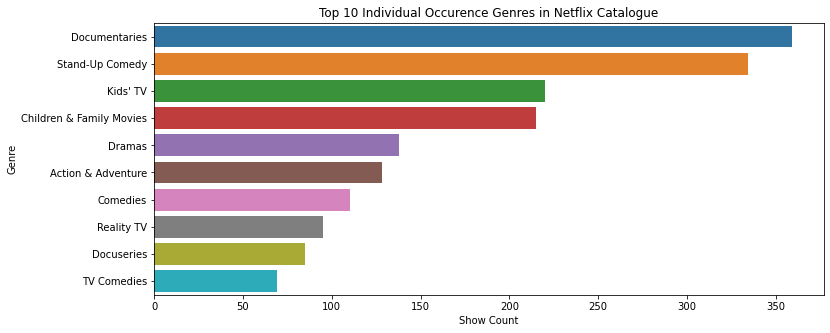

In [5]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
sns.barplot(x='Count', y='Name', data=single_appearance_df)
ax.set_ylabel('Genre')
ax.set_xlabel('Show Count')
plt.title('Top 10 Individual Occurence Genres in Netflix Catalogue')
plt.savefig('./single_occurence.png', facecolor='w', bbox_inches='tight')  
plt.show()